In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

RANDOM_STATE = 42

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df = pd.read_csv("/data/astro/scratch/msantama/tfm/data.csv")
df

,x.pnfsid,x.type,x.subtype,x.stddev_access_date,x.dt_last_access_date,x.dt_second_last_access_date,x.dt_third_last_access_date,x.dt_fourth_last_access_date,x.dt_fifth_last_access_date,x.normalized_access_count,x.normalized_filesize,x.temperature,x.size_category,x.above_median_access_count,x.above_median_filesize,x.access_count_last_1_day,x.access_count_last_3_days,x.access_count_last_7_days,x.access_count_last_15_days,x.lifetime,x.access_count,x.read_data_per_second,y,m_date_window
0,000000019BAA63584725A864DB1B460EB510,data,AOD,0.000000,254352,NaN,NaN,NaN,NaN,0.000000,0.503096,cold-warm,xlarge,0,1,0,1,1,1,254352,1,16242.631896,1,2021-01-16
1,0000000EF04D47B344FA91F943950384AFAB,mc,AODSIM,0.000000,347232,NaN,NaN,NaN,NaN,0.272727,0.246947,hot,medium,1,0,0,0,1,1,1731415,4,1488.246422,0,2021-01-16
2,00000012A42AE234405DB0FC82389E1C7596,mc,AODSIM,0.000000,364406,NaN,NaN,NaN,NaN,0.000000,0.383230,warm-hot,large,0,1,0,0,1,1,364406,1,10924.823826,0,2021-01-16
3,000000140E53D58F44FD986BFA14AC2ED2C1,data,MINIAOD,1714.017503,1291371,1294799.0,NaN,NaN,NaN,0.003922,0.504987,warm-hot,small,1,0,0,0,0,2,1294799,2,3346.479006,1,2021-01-16
4,00000018DA8A1C2D4A02B336E00D3A308773,mc,MINIAODSIM,1840.041739,485623,486241.0,486707.0,487578.0,488132.0,0.050657,0.071942,warm-hot,small,1,0,0,0,10,10,8433588,28,6.472632,1,2021-01-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14418330,0000FFF85E93AD4A4D26A79151831A5DE80E,data,RAW,0.000000,279173,NaN,NaN,NaN,NaN,0.000000,0.416933,cold-warm,small,0,0,0,0,1,1,8044810,2,756.514313,0,2023-12-23
14418331,0000FFF8F85576294065A64818287318A706,data,ALCARECO,2590.518095,807466,812647.0,NaN,NaN,NaN,0.055556,0.072080,hot,medium,1,0,0,0,0,2,812647,2,371.153404,0,2023-12-23
14418332,0000FFFD364BF9574D6FBF6C7C21508A0CF5,data,RAW,13226.010736,237817,264269.0,NaN,NaN,NaN,0.001555,0.798885,cold-warm,xlarge,0,1,0,1,2,2,7992906,3,1404.442556,0,2023-12-23
14418333,0000FFFDAF37D1204498ABB4F0A688C9E0AA,data,RAW,802.236873,268330,269934.0,NaN,NaN,NaN,0.001555,0.832457,cold-warm,xlarge,0,1,0,0,2,2,8002944,3,1454.809582,0,2023-12-23


In [4]:
df.isna().sum()

x.pnfsid                               0
x.type                                 0
x.subtype                              0
x.stddev_access_date                2775
x.dt_last_access_date                  0
x.dt_second_last_access_date     8259197
x.dt_third_last_access_date     11459742
x.dt_fourth_last_access_date    12551818
x.dt_fifth_last_access_date     13065357
x.normalized_access_count          16054
x.normalized_filesize                 32
x.temperature                          0
x.size_category                        0
x.above_median_access_count            0
x.above_median_filesize                0
x.access_count_last_1_day              0
x.access_count_last_3_days             0
x.access_count_last_7_days             0
x.access_count_last_15_days            0
x.lifetime                             0
x.access_count                         0
x.read_data_per_second                32
y                                      0
m_date_window                          0
dtype: int64

In [5]:
df[df['x.normalized_access_count'].isna()]

,x.pnfsid,x.type,x.subtype,x.stddev_access_date,x.dt_last_access_date,x.dt_second_last_access_date,x.dt_third_last_access_date,x.dt_fourth_last_access_date,x.dt_fifth_last_access_date,x.normalized_access_count,x.normalized_filesize,x.temperature,x.size_category,x.above_median_access_count,x.above_median_filesize,x.access_count_last_1_day,x.access_count_last_3_days,x.access_count_last_7_days,x.access_count_last_15_days,x.lifetime,x.access_count,x.read_data_per_second,y,m_date_window
48785,00006D60D21743DB42CBBA0EFB5FB7F08289,data,RECO,0.0,492070,NaN,NaN,NaN,NaN,NaN,NaN,hot,xlarge,0,0,0,0,1,1,27383125,3,0.000000,0,2021-01-23
156205,00006D60D21743DB42CBBA0EFB5FB7F08289,data,RECO,0.0,1096870,NaN,NaN,NaN,NaN,NaN,NaN,hot,xlarge,0,0,0,0,0,1,27987925,3,0.000000,0,2021-01-30
254376,000000CDAF6EE40F41BFB3075D4D784E95A8,data,RAW-RECO,0.0,279321,NaN,NaN,NaN,NaN,NaN,0.580149,hot,medium,0,0,0,0,1,1,279321,1,21310.255387,0,2021-02-06
254423,00000131E82EA002438A8AEB173DE775BE69,data,RAW-RECO,0.0,202998,NaN,NaN,NaN,NaN,NaN,0.901521,hot,xlarge,0,1,0,1,1,1,202998,1,43300.206608,0,2021-02-06
254654,0000035489E403324767988D8ADA81F85244,data,RAW-RECO,0.0,185168,NaN,NaN,NaN,NaN,NaN,0.916924,hot,xlarge,0,1,0,1,1,1,185168,1,48204.055587,0,2021-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13651635,0000FA7E151FFF55497F9E7549696C733ED9,mc,GEN-SIM-DIGI-RAW,0.0,652738,NaN,NaN,NaN,NaN,NaN,0.783563,hot,large,0,1,0,0,0,1,652738,1,29376.058703,1,2023-10-28
13651685,0000FABAD88D711C4950B8EE809AFDAC82DB,mc,GEN-SIM-DIGI-RAW,0.0,642150,NaN,NaN,NaN,NaN,NaN,0.080226,hot,small,0,0,0,0,0,1,642150,1,14745.608848,1,2023-10-28
13651730,0000FB05378EA88B40CEA7EB79AD1A8796CE,mc,GEN-SIM-DIGI-RAW,0.0,672045,NaN,NaN,NaN,NaN,NaN,0.888164,hot,xlarge,0,1,0,0,0,1,672045,1,30680.016398,1,2023-10-28
13652164,0000FD94804909BB43DBB7E4F21D7092DE2D,mc,GEN-SIM-DIGI-RAW,0.0,656476,NaN,NaN,NaN,NaN,NaN,0.882287,hot,xlarge,0,1,0,0,0,1,656476,1,31284.100394,1,2023-10-28


In [6]:
train_dates = df['m_date_window'].unique()[:-51]
test_dates = df['m_date_window'].unique()[-51:]

train_data = df[df['m_date_window'].isin(train_dates)]
test_data = df[df['m_date_window'].isin(test_dates)]

del df

In [7]:
X = train_data.drop(columns=['y']) 
y = train_data['y']
del train_data

In [80]:
all_periods = X['m_date_window'].unique()
y_frequencies = []
dates = []
for period in all_periods:
    mask = X['m_date_window'] == period
    X_period = X[mask]
    y_period = y[mask]

    # X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    #     X_period, y_period, test_size=0.4, random_state=RANDOM_STATE, stratify=y_period
    #     )
    y_frequencies.append(y_period.mean())
    dates.append(period)
    

In [81]:
y_freq_series = pd.Series(y_frequencies, index=dates, name="y_frequency")

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE, stratify=y)
del X, y

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840147 entries, 2590990 to 3589006
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   x.pnfsid                      object 
 1   x.type                        object 
 2   x.subtype                     object 
 3   x.stddev_access_date          float64
 4   x.dt_last_access_date         int64  
 5   x.dt_second_last_access_date  float64
 6   x.dt_third_last_access_date   float64
 7   x.dt_fourth_last_access_date  float64
 8   x.dt_fifth_last_access_date   float64
 9   x.normalized_access_count     float64
 10  x.normalized_filesize         float64
 11  x.temperature                 object 
 12  x.size_category               object 
 13  x.above_median_access_count   int64  
 14  x.above_median_filesize       int64  
 15  x.access_count_last_1_day     int64  
 16  x.access_count_last_3_days    int64  
 17  x.access_count_last_7_days    int64  
 18  x.access_count_last_1

In [124]:
class FullsizeRounder(BaseEstimator, TransformerMixin):
    """
    Custom transformer that rounds the 'f.fullsize' column to the nearest 100 units.
    Drops the original 'f.fullsize' and adds 'f.fullsize_rounded'.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if 'f.fullsize' in X.columns:
            X['f.fullsize_rounded'] = (X['f.fullsize'] // 100) * 100
            X = X.drop(columns=['f.fullsize'])
        return X

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return ['f.fullsize_rounded']
        features = list(input_features)
        if 'f.fullsize' in features:
            features.remove('f.fullsize')
        features.append('f.fullsize_rounded')
        return features

In [125]:
class Log1pTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        return np.log1p(X)

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return None
        return [f"log1p_{feat}" for feat in input_features]

In [126]:
class YearFractionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        dates = pd.to_datetime(X['m_date_window'], errors='coerce')
        year_start = pd.to_datetime(dates.dt.year.astype(str) + '-01-01')
        year_end = pd.to_datetime(dates.dt.year.astype(str) + '-12-31')
        days_in_year = (year_end - year_start).dt.days + 1
        days_passed = (dates - year_start).dt.days
        X['m_date_window_year_frac'] = days_passed / days_in_year
        X = X.drop(columns=['m_date_window'])  # Drop the original column
        return X

    def get_feature_names_out(self, input_features=None):
        return ['m_date_window_year_frac']

In [127]:
column_transformer = ColumnTransformer([
    ('log1p', Log1pTransformer(), ['m_lifetime_days', 'avg_read_data']),
    ('ohe', OneHotEncoder(), ['f.type', 'f.subtype'])
], remainder='passthrough')

In [128]:
from xgboost import XGBClassifier

algorithm = XGBClassifier(
    tree_method="hist", 
    device="cuda"
)

In [129]:
pipe = Pipeline([
    ('year_frac', YearFractionTransformer()),
    ('fullsize_rounder', FullsizeRounder()),
    ('column_transformer', column_transformer),
    ('alg', algorithm)

])

In [133]:
X_train['m_date_window'] = pd.to_datetime(X_train['m_date_window'])
X_train['m_date_window']
# Convert m_date_window to ordinal (days since epoch)
date_ordinals = X_train['m_date_window'].map(pd.Timestamp.toordinal)

# Normalize to [0, 1]
date_norm = (date_ordinals - date_ordinals.min()) / (date_ordinals.max() - date_ordinals.min())

# Apply decaying exponential (e.g., decay_rate=3, adjust as needed)
decay_rate = 10
sample_weights = np.exp(-decay_rate * date_norm)

In [136]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Use a reasonably wide grid but avoid extreme values to reduce overfitting
param_grid = {
    'alg__n_estimators': [100, 200, 300],
    'alg__max_depth': [3, 5, 7, 9],
    'alg__learning_rate': [0.01, 0.05, 0.1],
    'alg__subsample': [0.7, 0.85, 1.0],
    'alg__colsample_bytree': [0.7, 0.85, 1.0],
    'alg__gamma': [0, 1, 3],
    'alg__reg_alpha': [0, 0.5, 1],
    'alg__reg_lambda': [1, 2, 3],
    'alg__scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=3
)

# Fit with sample weights
grid_search.fit(X_train, y_train, alg__sample_weight=sample_weights)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5] END alg__colsample_bytree=0.7, alg__gamma=0, alg__learning_rate=0.01, alg__max_depth=3, alg__n_estimators=100, alg__reg_alpha=0, alg__reg_lambda=1, alg__scale_pos_weight=5.057822490834241, alg__subsample=0.7;, score=0.661 total time=  17.4s
[CV 2/5] END alg__colsample_bytree=0.7, alg__gamma=0, alg__learning_rate=0.01, alg__max_depth=3, alg__n_estimators=100, alg__reg_alpha=0, alg__reg_lambda=1, alg__scale_pos_weight=5.057822490834241, alg__subsample=0.7;, score=0.659 total time=  17.5s
[CV 3/5] END alg__colsample_bytree=0.7, alg__gamma=0, alg__learning_rate=0.01, alg__max_depth=3, alg__n_estimators=100, alg__reg_alpha=0, alg__reg_lambda=1, alg__scale_pos_weight=5.057822490834241, alg__subsample=0.7;, score=0.663 total time=  17.1s
[CV 4/5] END alg__colsample_bytree=0.7, alg__gamma=0, alg__learning_rate=0.01, alg__max_depth=3, alg__n_estimators=100, alg__reg_alpha=0, alg__reg_lambda=1, alg__scale_pos_weight=5.057

KeyboardInterrupt: 

In [134]:
import json
from xgboost import XGBClassifier

# Load the best parameters from the JSON file
with open("/nfs/pic.es/user/m/msantama/Work/Project2/Intent2/best_params.json", "r") as f:
    best_params = json.load(f)

# Update the XGBoost classifier with the best parameters
best_algorithm = XGBClassifier(**best_params, tree_method="hist", device="cuda")

# Update the pipeline with the best algorithm
pipe.set_params(alg=best_algorithm)

# Fit the pipeline with the training data
pipe.fit(X_train, y_train, alg__sample_weight=sample_weights)

/data/jupyter/software/envs/master/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('year_frac', YearFractionTransformer()),
                ('fullsize_rounder', FullsizeRounder()),
                ('column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log1p', Log1pTransformer(),
                                                  ['m_lifetime_days',
                                                   'avg_read_data']),
                                                 ('ohe', OneHotEncoder(),
                                                  ['f.type', 'f.subtype'])])),
                ('alg',
                 XGBClassifier(base_score=None, booster=None, callbacks=No...
                               gamma=1.0607220641084703, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.15357106109235696, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=207,
                               n_jobs=None, num_parallel_tree=None, ...))])

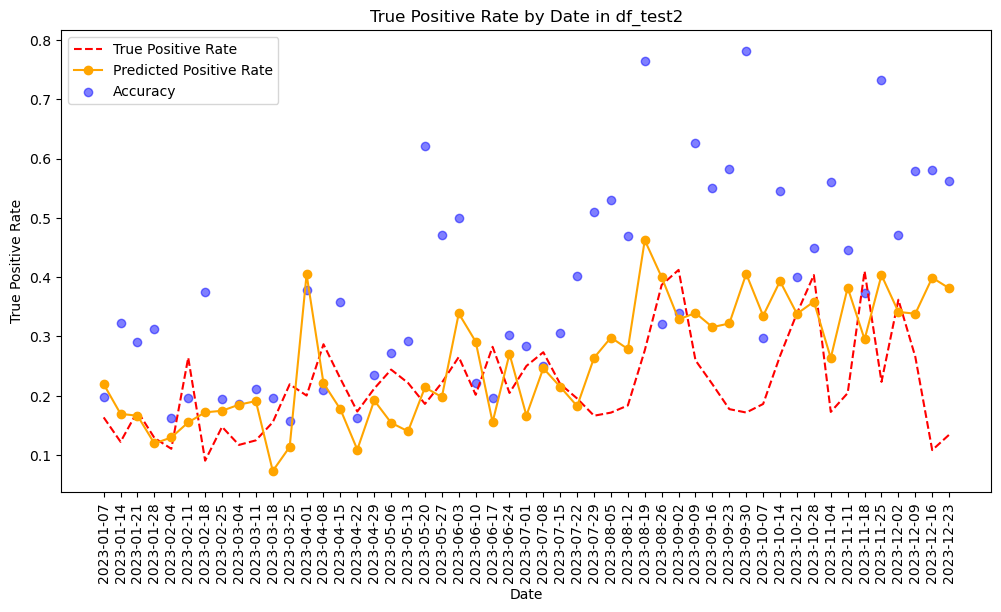

In [135]:
# Plot the distribution of the target variable in the test set by date
dates = test_data['m_date_window'].unique()
test_data.dropna(subset=['y', 'f.type', 'f.subtype'], inplace=True)
X_test2 = test_data.drop(columns=['y'])
y_test2 = test_data['y']
y_1_true_list = []
y_1_pred_list = []
accuracy_list = []

for date in dates:
    date_mask = X_test2['m_date_window'] == date
    y_true_date = y_test2[date_mask]
    y_pred_date = pipe.predict(X_test2[date_mask])
    accuracy_date = recall_score(y_true_date, y_pred_date)
    y_1_true_list.append(y_true_date.mean())
    y_1_pred_list.append(y_pred_date.mean())
    accuracy_list.append(accuracy_date)

plt.figure(figsize=(12, 6))
plt.plot(dates, y_1_true_list, '--', color='red', label='True Positive Rate')
plt.plot(dates, y_1_pred_list, 'o-', color='orange', label='Predicted Positive Rate')
plt.scatter(dates, accuracy_list, color='blue', alpha=0.5, label='Accuracy')
plt.xlabel('Date')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rate by Date in df_test2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
column_transformer = ColumnTransformer([
    ('log1p', Log1pTransformer(), ['median_dt_days', 'min_dt_days', 'max_dt_days', 'lifetime_days', 'avg_read_data']),
    ('ohe', OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [ ]:
from xgboost import XGBClassifier

algorithm = XGBClassifier(
    tree_method="hist", 
    device="cuda"
)

In [ ]:
pipe = Pipeline([
    ('year_frac', YearFractionTransformer()),
    ('cimputer', CustomImputer()),
    ('fullsize_rounder', FullsizeRounder()),
    ('column_transformer', column_transformer),
    ('alg', algorithm)

])

In [ ]:
numerical_features = ['median_dt_days', 'min_dt_days', 'max_dt_days', 'f.fullsize', 'access_count', 'lifetime_days', 'reaccess_count', 'avg_read_data', 'time_since_last_access_days', 'f.access_last_1_day', 'f.access_last_3_days', 'f.access_last_7_days', 'f.access_last_15_days', 'f.access_last_30_days', 'm_date_window']
categorical_features = ['f.type', 'f.subtype']

In [ ]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cols = ['median_dt_days', 'min_dt_days', 'max_dt_days']
        self.lifetime_col = 'lifetime_days'
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col in self.cols:
            mask = X[col].isna()
            X.loc[mask, col] = X.loc[mask, self.lifetime_col]
            if col == 'median_dt_days':
                diff_col = f'{col}_diff_lifetime'
                X[diff_col] = (X[self.lifetime_col] - X[col]).abs()
                X[f'{diff_col}_flag'] = (X[diff_col] != 0).astype(int)
        return X  # Return DataFrame

In [ ]:
column_transformer = ColumnTransformer([
    ('log1p', Log1pTransformer(), ['median_dt_days', 'min_dt_days', 'max_dt_days', 'lifetime_days', 'avg_read_data']),
    ('ohe', OneHotEncoder(), categorical_features)
], remainder='passthrough')

In [ ]:
from xgboost import XGBClassifier

algorithm = XGBClassifier(
    tree_method="hist", 
    device="cuda"
)

In [ ]:
pipe = Pipeline([
    ('year_frac', YearFractionTransformer()),
    ('cimputer', CustomImputer()),
    ('fullsize_rounder', FullsizeRounder()),
    ('column_transformer', column_transformer),
    ('alg', algorithm)

])

In [ ]:
# import optuna
# from sklearn.model_selection import cross_val_score

# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 300),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "gamma": trial.suggest_float("gamma", 0, 5),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
#         "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
#         "tree_method": "hist",
#         "device": "cuda"
#     }
#     algorithm = XGBClassifier(**params)
#     pipe.set_params(alg=algorithm)
#     score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="f1").mean() #TODO: Potser la mu sobre la sigma
#     return score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# print("Best trial:")
# print(study.best_trial.params)

# # Set the best params to the pipeline and retrain
# best_params = study.best_trial.params
# best_algorithm = XGBClassifier(**best_params)
# pipe.set_params(alg=best_algorithm)
# pipe.fit(X_train, y_train)

In [ ]:
# def objective(trial):
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 200, 250),
#         "max_depth": trial.suggest_int("max_depth", 10, 25),
#         "learning_rate": trial.suggest_float("learning_rate", 0.15, 0.5, log=True),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         "gamma": trial.suggest_float("gamma", 0.8, 1.2),
#         "reg_alpha": trial.suggest_float("reg_alpha", 0.8, 1.2),
#         "reg_lambda": trial.suggest_float("reg_lambda", 2, 3),
#         "scale_pos_weight": trial.suggest_float("scale_pos_weight", 2, 8),
#         "tree_method": "hist",
#         "device": "cuda"
#     }
#     algorithm = XGBClassifier(**params)
#     pipe.set_params(alg=algorithm)
#     score = cross_val_score(pipe, X_train, y_train, cv=3, scoring="recall").mean()
#     return score

# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)  # Increase n_trials for a broader search

# print("Best trial:")
# print(study.best_trial.params)

# # Set the best params to the pipeline and retrain
# best_params = study.best_trial.params
# best_algorithm = XGBClassifier(**best_params)
# pipe.set_params(alg=best_algorithm)
# pipe.fit(X_train, y_train)

In [ ]:
import json
from xgboost import XGBClassifier

# Load the best parameters from the JSON file
with open("/nfs/pic.es/user/m/msantama/Work/Project2/Intent2/best_params.json", "r") as f:
    best_params = json.load(f)

# Update the XGBoost classifier with the best parameters
best_algorithm = XGBClassifier(**best_params, tree_method="hist", device="cuda")

# Update the pipeline with the best algorithm
pipe.set_params(alg=best_algorithm)

# Fit the pipeline with the training data
pipe.fit(X_train, y_train)

KeyError: 'median_dt_days'

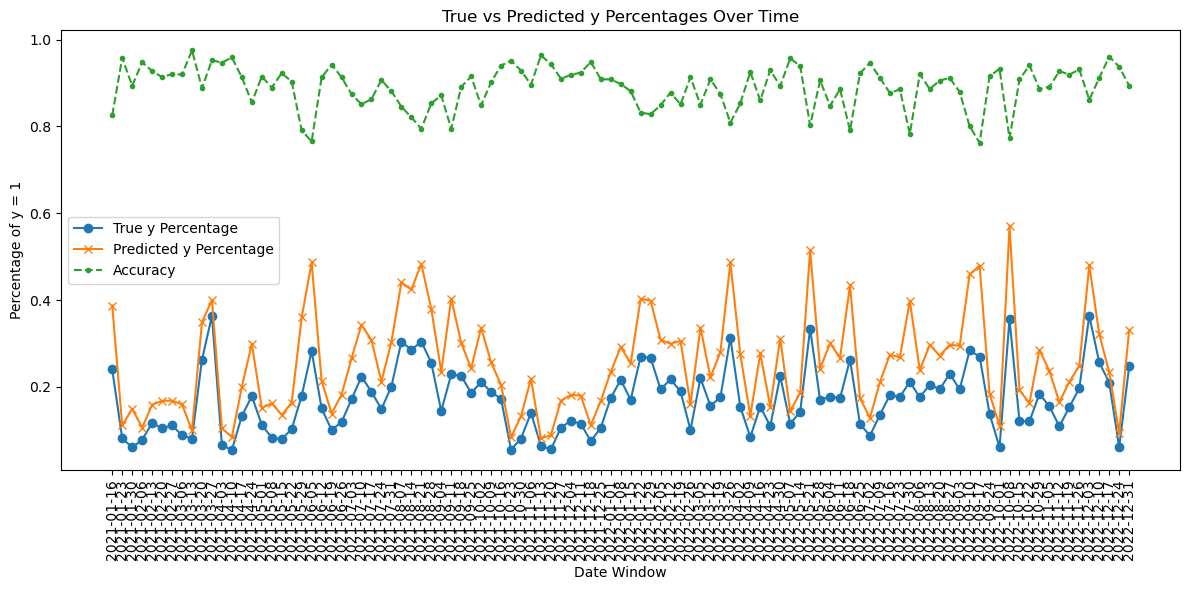

In [ ]:
sorted_dates = np.sort(X_test['m_date_window'].unique())
true_y_percentages = []
pred_y_percentages = []
accuracies = []
for date in sorted_dates:
    X_date = X_test[X_test['m_date_window'] == date]
    y_date = y_test[X_test['m_date_window'] == date]
    
    if len(X_date) == 0:
        continue
    
    y_pred = pipe.predict(X_date)
    
    acc = accuracy_score(y_date, y_pred)
    true_y_percentages.append(y_date.mean())
    pred_y_percentages.append(y_pred.mean())
    accuracies.append(acc)
plt.figure(figsize=(12, 6))
plt.plot(sorted_dates, true_y_percentages, label='True y Percentage', marker='o')
plt.plot(sorted_dates, pred_y_percentages, label='Predicted y Percentage', marker='x')
plt.plot(sorted_dates, accuracies, label='Accuracy', marker='.', linestyle='--')
plt.title('True vs Predicted y Percentages Over Time')
plt.xlabel('Date Window')
plt.ylabel('Percentage of y = 1')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


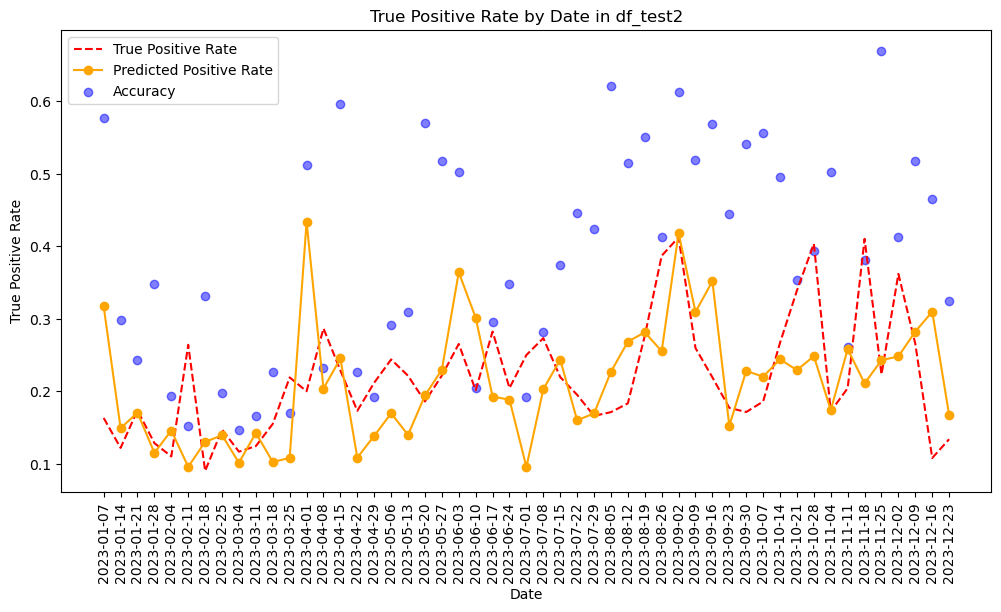

In [ ]:
# Plot the distribution of the target variable in the test set by date
dates = df_test['m_date_window'].unique()
df_test.dropna(subset=['f.y', 'f.type', 'f.subtype'], inplace=True)
df_test.drop(columns=['f.pnfsid'], inplace=True, errors='ignore')
X_test2 = df_test.drop(columns=['f.y'])
y_test2 = df_test['f.y']
y_1_true_list = []
y_1_pred_list = []
accuracy_list = []

for date in dates:
    date_mask = X_test2['m_date_window'] == date
    y_true_date = y_test2[date_mask]
    y_pred_date = pipe.predict(X_test2[date_mask])
    accuracy_date = recall_score(y_true_date, y_pred_date)
    y_1_true_list.append(y_true_date.mean())
    y_1_pred_list.append(y_pred_date.mean())
    accuracy_list.append(accuracy_date)

plt.figure(figsize=(12, 6))
plt.plot(dates, y_1_true_list, '--', color='red', label='True Positive Rate')
plt.plot(dates, y_1_pred_list, 'o-', color='orange', label='Predicted Positive Rate')
plt.scatter(dates, accuracy_list, color='blue', alpha=0.5, label='Accuracy')
plt.xlabel('Date')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rate by Date in df_test2')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Get the fitted XGBoost model from the pipeline
xgb_model = pipe.named_steps['alg']

# Get feature importances from the model
importances = xgb_model.feature_importances_

# Get feature names after transformation
# This works for sklearn >= 1.0
feature_names = pipe.named_steps['column_transformer'].get_feature_names_out()

# Combine feature names and importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

                                         feature  importance
30  remainder__median_dt_days_diff_lifetime_flag    0.105598
10               ohe__f.subtype_GEN-SIM-DIGI-RAW    0.059880
17                            ohe__f.subtype_RAW    0.057026
8                             ohe__f.subtype_AOD    0.052515
7                        ohe__f.subtype_ALCARECO    0.051039
18                       ohe__f.subtype_RAW-RECO    0.049502
11                    ohe__f.subtype_GEN-SIM-RAW    0.048434
27            remainder__f.accesses_last_30_days    0.046960
28            remainder__m_date_window_year_frac    0.044399
12                   ohe__f.subtype_GEN-SIM-RECO    0.043528
5                               ohe__f.type_data    0.039695
19                           ohe__f.subtype_RECO    0.036781
9                          ohe__f.subtype_AODSIM    0.030219
13                        ohe__f.subtype_MINIAOD    0.029408
6                                 ohe__f.type_mc    0.029330
21                     r

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Baseline model: Predict 1 if time_since_last_access_days < 7, else 0
def baseline_model(X):
    return (X['time_since_last_access_days'] < 7).astype(int)

# Apply the baseline model to the test set
y_pred_baseline = baseline_model(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)

# Print the results
print("Baseline Model Metrics:")
print(f"Accuracy score: {accuracy:.4f}")
print(f"Recall score: {recall:.4f}")
print(f"Precision score: {precision:.4f}")

Baseline Model Metrics:
Accuracy score: 0.5256
Recall score: 0.6768
Precision score: 0.2097
